In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
google_vocab_k_nk = "vocab_cs_mod.txt"
google_vocab_raw_frew = "google_vocab_rawwordfreqs.txt"
data = {}
f = open(google_vocab_k_nk,'r')
vocab = f.read().split()
f.close()
for i in range(0, len(vocab),2):
    k = int(vocab[i])
    nk = int(vocab[i+1])
    data[k] = nk

In [141]:
def get_line_fit(x,y):
    # determine best fit line
    fit_params = np.polyfit(x, y, 1, full=False)
    beta, c = fit_params
    return beta,c
# scatter plot N vs time
def plot_fitted_line(x_data:list, y_data:list, plot_data:dict = None, save = False, plot_log = False):
    # get line on log transformed data
    beta, log10c = get_line_fit(np.log10(x_data), np.log10(y_data))
    fig = plt.figure()
    ax = plt.gca()
    if plot_log:
        x_fit = np.logspace(min(x_data), max(y_data), 1000)
        y_fit = beta*x_fit + log10c
    else:
        x_fit = np.linspace(min(x_data), max(y_data), 1000)
        y_fit = 10**(log10c)*x_fit**(beta) 
    ax.plot(x_fit, y_fit, label = f'y = {10**(log10c):.3f} x^{beta: .3f}')
    ax.plot(x_data ,y_data, 'o', c='red', alpha=1.0, markeredgecolor='none', label = "data")
    ax.set_xlabel(plot_data["xlabel"])
    ax.set_ylabel(plot_data["ylabel"])
    ax.set_title(plot_data["title"])
#     ax.set_xlim([min(x_data), max(x_data)])
#     ax.set_ylim([min(y_data), max(y_data)])
    plt.legend()
    if save:
        plt.savefig(plot_data["title"]+".png")
    plt.show()

def plot_data(x_data:list, y_data:list, plot_data:dict = None, save = False, plot_log = False):
    fig = plt.figure()
    ax = plt.gca()
    if plot_log:
        ax.plot(np.log10(x_data) ,np.log10(y_data), 'o', c='red', alpha=1.0, markeredgecolor='none', label = "data")
    else:
        ax.plot(x_data ,y_data, 'o', c='red', alpha=1.0, markeredgecolor='none', label = "data")
    ax.set_xlabel(plot_data["xlabel"])
    ax.set_ylabel(plot_data["ylabel"])
    ax.set_title(plot_data["title"])
#     ax.set_xlim([min(x_data), max(x_data)])
#     ax.set_ylim([min(y_data), max(y_data)])
    plt.legend()
    if save:
        plt.savefig(plot_data_dict["save_as"]+".png")
    plt.show()

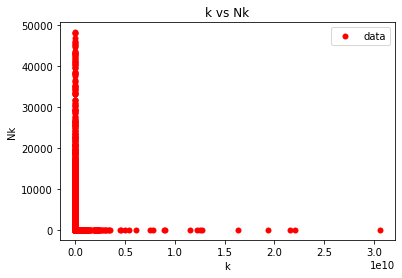

In [105]:
plot_data_dict = {}
plot_data_dict["xlabel"] = "k"
plot_data_dict["ylabel"] = "Nk"
plot_data_dict["title"] = "k vs Nk"
plot_data_dict["save_as"] = "k_vs_Nk"
plot_data(list(data.keys()), list(data.values()), plot_data_dict, save = True)

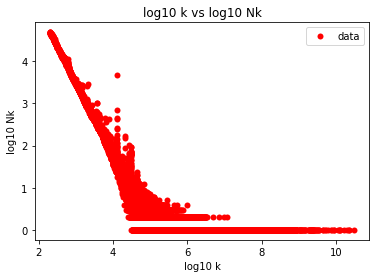

In [106]:
plot_data_dict = {}
plot_data_dict["xlabel"] = "log10 k"
plot_data_dict["ylabel"] = "log10 Nk"
plot_data_dict["title"] = "log10 k vs log10 Nk"
plot_data_dict["save_as"] = "log10_k_vs_log10_Nk"
plot_data(list(data.keys()), list(data.values()), plot_data_dict, save = True, plot_log = True)

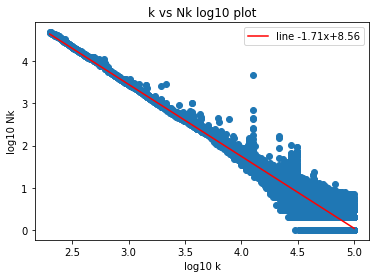

In [132]:
plot_data_dict = {}
plot_data_dict["xlabel"] = "log10 k"
plot_data_dict["ylabel"] = "log10 Nk"
plot_data_dict["title"] = "log10 k vs log10 Nk"
plot_data_dict["save_as"] = "log10_k_vs_log10_Nk"
# sort dict with log 10 values of keys less than 5
sorted_data = {np.log10(k): np.log10(v) for k, v in sorted(data.items(), key=lambda item: item[0])}
filtered_data = { k:v for k,v in sorted_data.items() if k < 5}
x_data = list(filtered_data.keys())
y_data = list(filtered_data.values())
fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.set_xlabel("log10 k")
ax.set_ylabel("log10 Nk")
ax.set_title("k vs Nk log10 plot")
#find line of best fit
a, b = np.polyfit(x_data,y_data, 1)
ax.plot(x_data, a*np.array(x_data)+b, color= 'r', label = "line {}x+{}".format(round(a,2), round(b,2)))
plt.legend()
plt.savefig("regression_over_filtered_data.png")
plt.show()


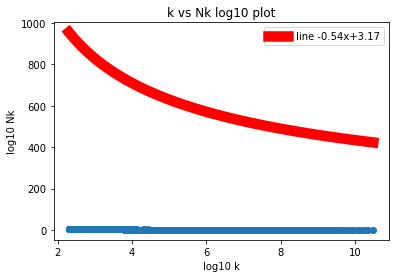

In [159]:
x_data = np.log10(list(data.keys()))
y_data = np.log10(list(data.values()))
fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.set_xlabel("log10 k")
ax.set_ylabel("log10 Nk")
ax.set_title("k vs Nk log10 plot")
#find line of best fit
a, b = np.polyfit(x_data,y_data, 1)
ax.plot(x_data, 10**(b)*x_data**(a) , color= 'r', linewidth=10.5, label = "line {}x+{}".format(round(a,2), round(b,2)))
plt.legend()
# plt.savefig("regression_over_filtered_data.png")
plt.show()

In [137]:
# mean and std
# mean = sum (nk*k) / sum (nk)
# std = sqrt(sum(k- mean)^2/ sum(nk)))
def compute_mean(data:dict):
    """
    data k -> nk
    """
    sum_nk = 0
    sum_nk_k = 0
    for k in data.keys():
        sum_nk += data[k]
        sum_nk_k += data[k]*k
    return sum_nk_k/sum_nk

def compute_std(data:dict):
    """
    data k -> nk
    """
    mean = compute_mean(data)
    sum_nr = 0
    sum_dr = 0
    for k in data.keys():
        sum_nr += np.power((k - mean),2)
        sum_dr += data[k]
    return np.sqrt(sum_nr/sum_dr)

In [139]:
print("Mean of data = {}\nSTD of data = {}\n".format(compute_mean(data), compute_std(data)))

Mean of data = 61651.63497241709
STD of data = 16783754.847224765

